Menyiapkan akun kredensial kaggle

In [ ]:
!rm -rf ~/.kaggle && mkdir ~/.kaggle/

!mv kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

Import dataset dari kaggle

In [ ]:
!kaggle datasets download -d CooperUnion/anime-recommendations-database

 64% 16.0M/25.0M [00:00<00:00, 84.7MB/s]
100% 25.0M/25.0M [00:00<00:00, 95.1MB/s]


Mengesktrak dataset

In [ ]:
!unzip /content/anime-recommendations-database.zip

Archive:  /content/anime-recommendations-database.zip
  inflating: anime.csv               
  inflating: rating.csv              


Univariate Exploratory Data Analysis

In [ ]:
import pandas as pd
 
Anime = pd.read_csv('/content/anime.csv')
ratings = pd.read_csv('/content/rating.csv')

Melihat Sebagian Data Anime

In [ ]:
Anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Menghitung banyak anime_id tanpa nilai yang sama

In [ ]:
print('Banyak data: ', len(Anime.anime_id.unique()))

Banyak data:  12294


Melihat sebagian data rating

In [ ]:
ratings.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


melihat rating info

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


Melihat deskripsi rating

In [ ]:
ratings.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


Menghitung banyak user_id tanpa nilai yang sama

In [ ]:
print('Banyak data: ', len(ratings.user_id.unique()))

Banyak data:  73515


Data Preprocessing

In [ ]:
AnimeData=ratings.merge(Anime,on='anime_id', how="left")
AnimeData.head()

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297.0
1,1,24,-1,School Rumble,"Comedy, Romance, School, Shounen",TV,26,8.06,178553.0
2,1,79,-1,Shuffle!,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...",TV,24,7.31,158772.0
3,1,226,-1,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,7.85,623511.0
4,1,241,-1,Girls Bravo: First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",TV,11,6.69,84395.0


Data Preparation General

In [ ]:
AnimeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7813737 entries, 0 to 7813736
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user_id   int64  
 1   anime_id  int64  
 2   rating_x  int64  
 3   name      object 
 4   genre     object 
 5   type      object 
 6   episodes  object 
 7   rating_y  float64
 8   members   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 596.1+ MB


Menghitung banyak missing value

In [ ]:
AnimeData.isnull().sum()

user_id       0
anime_id      0
rating_x      0
name         10
genre       120
type         14
episodes     10
rating_y     16
members      10
dtype: int64

Membuang data mising value

In [ ]:
AnimeDataClean = AnimeData.dropna()
AnimeDataClean.head()

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297.0
1,1,24,-1,School Rumble,"Comedy, Romance, School, Shounen",TV,26,8.06,178553.0
2,1,79,-1,Shuffle!,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...",TV,24,7.31,158772.0
3,1,226,-1,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,7.85,623511.0
4,1,241,-1,Girls Bravo: First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",TV,11,6.69,84395.0


Mengecek apakah masih ada missing value

In [ ]:
AnimeDataClean.isnull().sum()

user_id     0
anime_id    0
rating_x    0
name        0
genre       0
type        0
episodes    0
rating_y    0
members     0
dtype: int64

Data Preparation: Content Based Filtering

In [ ]:
fixAnime = AnimeDataClean.sort_values('anime_id', ascending=True)
fixAnime

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
2788681,26182,1,9,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824.0
6396571,59285,1,10,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824.0
6486484,59950,1,10,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824.0
2959002,27488,1,-1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824.0
6674267,61561,1,9,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824.0
...,...,...,...,...,...,...,...,...,...
5704639,53492,34475,5,Monster Strike: Rain of Memories,"Action, Fantasy, Game",ONA,1,6.58,313.0
7558121,70768,34475,-1,Monster Strike: Rain of Memories,"Action, Fantasy, Game",ONA,1,6.58,313.0
1456909,13954,34475,6,Monster Strike: Rain of Memories,"Action, Fantasy, Game",ONA,1,6.58,313.0
5106536,48766,34476,-1,Platonic Chain: Ansatsu Jikkouchuu,"Sci-Fi, Slice of Life",Special,1,1.67,51.0


Menghitung banyak anime_id tanpa nilai yang sama

In [ ]:
len(fixAnime.anime_id.unique())

11162

Menyorting data anime_data

In [ ]:
preparation = fixAnime
preparation.sort_values('anime_id')

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
2788681,26182,1,9,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824.0
86238,905,1,8,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824.0
5811327,54347,1,8,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824.0
7446826,69497,1,10,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824.0
771463,7184,1,-1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824.0
...,...,...,...,...,...,...,...,...,...
5704639,53492,34475,5,Monster Strike: Rain of Memories,"Action, Fantasy, Game",ONA,1,6.58,313.0
7558121,70768,34475,-1,Monster Strike: Rain of Memories,"Action, Fantasy, Game",ONA,1,6.58,313.0
1456909,13954,34475,6,Monster Strike: Rain of Memories,"Action, Fantasy, Game",ONA,1,6.58,313.0
5106536,48766,34476,-1,Platonic Chain: Ansatsu Jikkouchuu,"Sci-Fi, Slice of Life",Special,1,1.67,51.0


Menghapus value yang sama pada anime_id

In [ ]:
preparation = preparation.drop_duplicates('anime_id')
preparation

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
2788681,26182,1,9,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824.0
5378946,50888,5,8,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,8.40,137636.0
4338303,40987,6,7,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32,283069.0
621251,6005,7,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Superna...",TV,26,7.36,64905.0
4548734,43376,8,7,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52,7.06,9848.0
...,...,...,...,...,...,...,...,...,...
6751597,62402,34367,4,Long Riders Recap,"Comedy, Shounen, Slice of Life, Sports",Special,1,5.97,582.0
7703451,72404,34412,-1,Hashiri Hajimeta bakari no Kimi ni,Music,Music,1,6.76,239.0
7535009,70547,34475,9,Monster Strike: Rain of Memories,"Action, Fantasy, Game",ONA,1,6.58,313.0
5106536,48766,34476,-1,Platonic Chain: Ansatsu Jikkouchuu,"Sci-Fi, Slice of Life",Special,1,1.67,51.0


Konversi data series menjadi list

In [ ]:
animeID = preparation['anime_id'].tolist()
title = preparation['name'].tolist()
Genre = preparation['genre'].tolist()

print(len(animeID))
print(len(title))
print(len(Genre))

11162
11162
11162


Membuat dataframe baru dengan data sebelum cell ini

In [ ]:
AnimeNew = pd.DataFrame({
    'AnimeID': animeID,
    'AnimeTitle': title,
    'AnimeGenre': Genre,
})
AnimeNew

,AnimeID,AnimeTitle,AnimeGenre
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space"
2,6,Trigun,"Action, Comedy, Sci-Fi"
3,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Superna..."
4,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural"
...,...,...,...
11157,34367,Long Riders Recap,"Comedy, Shounen, Slice of Life, Sports"
11158,34412,Hashiri Hajimeta bakari no Kimi ni,Music
11159,34475,Monster Strike: Rain of Memories,"Action, Fantasy, Game"
11160,34476,Platonic Chain: Ansatsu Jikkouchuu,"Sci-Fi, Slice of Life"


Model Development dengan Content Based Filtering

Mengambil sample dari data AnimeNew

In [ ]:
data = AnimeNew
data.sample(5)

,AnimeID,AnimeTitle,AnimeGenre
1817,2002,Heroic Age,"Action, Mecha, Military, Sci-Fi, Space"
8944,23617,Sore Ike! Anpanman: Ringo Boy to Minna no Negai,"Comedy, Fantasy, Kids"
10858,32740,Girls und Panzer der Film: Arisu War!,"Military, School"
9216,24987,Furueru Kuchibiru Episode 0,Hentai
1183,1300,Omishi Mahou Gekijou: Risky/Safety,"Comedy, Shoujo"


Menggunakan fungsi tfidfvectorizer() dari library sklearn

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
tf.fit(data['AnimeGenre'])

TfidfVectorizer()

Fit dan transformasi ke dalam bentuk matriks

In [ ]:
tfidf_matrix = tf.fit_transform(data['AnimeGenre']) 
tfidf_matrix.shape 

(11162, 47)

Menghasilkan vektor tf-idf dalam bentuk matriks

In [ ]:
tfidf_matrix.todense()

matrix([[0.31590087, 0.34207771, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.29960192, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.4886654 , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.3815329 , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

Melihat matriks tf-idf untuk bebrapa anime dan genrenya

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=data.AnimeID
).sample(47, axis=1).sample(10, axis=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,adventure,yuri,fantasy,sci,shounen,vampire,space,ecchi,slice,josei,...,mecha,action,parody,kids,horror,fi,hentai,life,samurai,mystery
AnimeID,,,,,,,,,,,,,,,,,,,,,
23855,0.0,0.0,0.000000,0.36433,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.468123,0.323695,0.584876,0.000000,0.000000,0.36433,0.0,0.000000,0.0,0.0
10908,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0
26137,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.643473,0.000000,0.00000,0.0,0.000000,0.0,0.0
31018,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.616667,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0
4224,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.438501,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.438501,0.0,0.0
14631,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.848607,0.000000,0.00000,0.0,0.000000,0.0,0.0
1573,0.0,0.0,0.294341,0.00000,0.318278,0.0,0.0,0.429409,0.000000,0.0,...,0.000000,0.267556,0.000000,0.000000,0.492833,0.00000,0.0,0.000000,0.0,0.0
12669,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0
6892,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.0,0.000000,0.0,0.0


Menghitung derajat kesamaan (similarity degree)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.77552252, 0.64645638, ..., 0.12052657, 0.28118184,
        0.25548059],
       [0.77552252, 1.        , 0.51734541, ..., 0.11430799, 0.26667422,
        0.        ],
       [0.64645638, 0.51734541, 1.        , ..., 0.18644193, 0.43495871,
        0.3952016 ],
       ...,
       [0.12052657, 0.11430799, 0.18644193, ..., 1.        , 0.        ,
        0.        ],
       [0.28118184, 0.26667422, 0.43495871, ..., 0.        , 1.        ,
        0.        ],
       [0.25548059, 0.        , 0.3952016 , ..., 0.        , 0.        ,
        1.        ]])

Melihat matriks kesamaan untup bebrapa sample anime

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['AnimeTitle'], columns=data['AnimeTitle'])
print('Shape:', cosine_sim_df.shape)
 
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (11162, 11162)


AnimeTitle,Code:Breaker,Ijoku,Wakie Wakie,Tsuma Tsuma,Magical Moe
AnimeTitle,,,,,
Betterman,0.186837,0.0,0.0,0.0,0.0
Guilty Crown,0.595465,0.0,0.0,0.0,0.0
Buta,0.077726,0.0,0.0,0.0,0.0
Hakubutsushi,0.000000,0.0,0.0,0.0,0.0
Kämpfer,0.572659,0.0,0.0,0.0,0.0
Himouto! Umaru-chan,0.208769,0.0,0.0,0.0,0.0
Tenjou Tenge,0.658958,0.0,0.0,0.0,0.0
Golden Boy,0.086230,0.0,0.0,0.0,0.0
Awate Tokoya,0.000000,0.0,1.0,0.0,0.0


Membuat fungsi anime_recommendations

In [ ]:
def anime_recommendations(AnimeTitle, similarity_data=cosine_sim_df, items=data[['AnimeTitle', 'AnimeGenre']], k=5):
    index = similarity_data.loc[:,AnimeTitle].to_numpy().argpartition(
        range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(AnimeTitle, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

Melihat isi keterangan dari anime Naruto

In [ ]:
data[data.AnimeTitle.eq('Naruto')]

,AnimeID,AnimeTitle,AnimeGenre
10,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P..."


Memanggil fungsi anime_recommendations untuk merekomendasikan anime yang serupa dengan Naruto

In [ ]:
anime_recommendations('Naruto')

,AnimeTitle,AnimeGenre
0,Naruto: Shippuuden Movie 4 - The Lost Tower,"Action, Comedy, Martial Arts, Shounen, Super P..."
1,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,"Action, Comedy, Martial Arts, Shounen, Super P..."
2,Boruto: Naruto the Movie - Naruto ga Hokage ni...,"Action, Comedy, Martial Arts, Shounen, Super P..."
3,Naruto Soyokazeden Movie: Naruto to Mashin to ...,"Action, Comedy, Martial Arts, Shounen, Super P..."
4,Naruto Shippuuden: Sunny Side Battle,"Action, Comedy, Martial Arts, Shounen, Super P..."


Data Preparation: Collaborative Filtering

In [ ]:
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
df = ratings
df

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


Menyandikan (encode) fitur ‘user_id’

In [ ]:
user_ids = df['user_id'].unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

Menyandikan (encode) fitur ‘anime_id’

In [ ]:
anime_ids = df['anime_id'].unique().tolist()
anime_to_anime_encoded = {x: i for i, x in enumerate(anime_ids)}
anime_encoded_to_anime = {i: x for i, x in enumerate(anime_ids)}

Memetakan user_id dan place_id ke dataframe yang berkaitan

In [ ]:
df['user'] = df['user_id'].map(user_to_user_encoded)
df['anime'] = df['anime_id'].map(anime_to_anime_encoded)

Cek beberapa hal dalam data seperti jumlah user, jumlah anime, dan mengubah nilai rating menjadi float

In [ ]:
import numpy as np 
num_users = len(user_to_user_encoded)
print(num_users)

num_anime = len(anime_encoded_to_anime)
print(num_anime)

df['rating'] = df['rating'].values.astype(np.float32)

min_rating = min(df['rating'])

max_rating = max(df['rating'])

print('Number of User: {}, Number of Anime: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_anime, min_rating, max_rating
))

73515
11200
Number of User: 73515, Number of Anime: 11200, Min Rating: -1.0, Max Rating: 10.0


Membagi Data untuk Training dan Validasi

In [ ]:
df = df.sample(frac=1, random_state=42)
df

,user_id,anime_id,rating,user,anime
7806172,73424,7785,10.0,73422,1067
6470262,59789,19769,6.0,59787,256
5975474,55960,59,10.0,55958,603
7617688,71461,3342,10.0,71459,1361
5932334,55390,986,8.0,55388,1408
...,...,...,...,...,...
6550634,60487,6880,7.0,60485,185
7705870,72443,13469,-1.0,72441,1102
6423388,59483,490,8.0,59481,3659
6962611,65007,4224,7.0,65005,22


In [ ]:
x = df[['user', 'anime']].values

y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[73422  1067]
 [59787   256]
 [55958   603]
 ...
 [59481  3659]
 [65005    22]
 [59404     0]] [1.         0.63636364 1.         ... 0.81818182 0.72727273 0.81818182]


Proses Training dengan Collaborative Filtering

In [ ]:
class RecommenderNet(tf.keras.Model):
  def __init__(self, num_users, num_anime, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_anime = num_anime
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.anime_embedding = layers.Embedding( 
        num_anime,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.anime_bias = layers.Embedding(num_anime, 1)
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) 
    user_bias = self.user_bias(inputs[:, 0])
    anime_vector = self.anime_embedding(inputs[:, 1])
    anime_bias = self.anime_bias(inputs[:, 1])
 
    dot_user_anime = tf.tensordot(user_vector, anime_vector, 2) 
 
    x = dot_user_anime + user_bias + anime_bias
    
    return tf.nn.sigmoid(x)

Proses compile terhadap mode

In [ ]:
model = RecommenderNet(num_users, num_anime, 50) 
 
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Proses training

In [ ]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=128,
    epochs=5,
    verbose=1,
    validation_data=(x_val, y_val),
)

Epoch 1/5
48836/48836 [==============================] - 279s 6ms/step - loss: 1.2523 - root_mean_squared_error: 0.3854 - val_loss: 1.2703 - val_root_mean_squared_error: 0.3744
Epoch 2/5
48836/48836 [==============================] - 261s 5ms/step - loss: 1.3306 - root_mean_squared_error: 0.3906 - val_loss: 1.3404 - val_root_mean_squared_error: 0.3686
Epoch 3/5
48836/48836 [==============================] - 276s 6ms/step - loss: 1.3877 - root_mean_squared_error: 0.3906 - val_loss: 1.3977 - val_root_mean_squared_error: 0.3685
Epoch 4/5
48836/48836 [==============================] - 259s 5ms/step - loss: 1.4367 - root_mean_squared_error: 0.3926 - val_loss: 1.4535 - val_root_mean_squared_error: 0.3662
Epoch 5/5
48836/48836 [==============================] - 274s 6ms/step - loss: 1.4744 - root_mean_squared_error: 0.3923 - val_loss: 1.4984 - val_root_mean_squared_error: 0.3666


Visualisasi Metrik

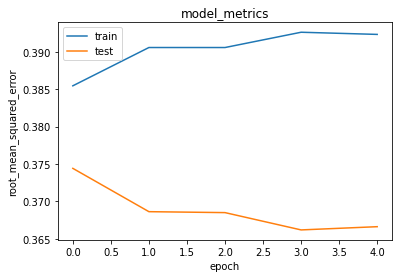

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Mendapatkan Rekomendasi

In [ ]:
animeDF = AnimeNew
df = pd.read_csv('rating.csv')

user_id = df.user_id.sample(1).iloc[0]
animewatch = df[df.user_id == user_id]

animenowatch = animeDF[~animeDF['AnimeID'].isin(animewatch.anime_id.values)]['AnimeID'] 
animenowatch = list(
    set(animenowatch)
    .intersection(set(anime_to_anime_encoded.keys()))
)
 
animenowatch = [[anime_to_anime_encoded.get(x)] for x in animenowatch]
user_encoder = user_to_user_encoded.get(user_id)
user_anime_array = np.hstack(
    ([[user_encoder]] * len(animenowatch), animenowatch)
)

In [ ]:
ratings = model.predict(user_anime_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_anime_ids = [
    anime_encoded_to_anime.get(animenowatch[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Anime with high ratings from user')
print('----' * 8)
 
top_anime_user = (
    animewatch.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .anime_id.values
)
 
anime_df_rows = animeDF[animeDF['AnimeID'].isin(top_anime_user)]
for row in anime_df_rows.itertuples():
    print(row.AnimeTitle, ':', row.AnimeGenre)
 
print('----' * 8)
print('Top 10 anime recommendation')
print('----' * 8)
 
recommended_anime = animeDF[animeDF['AnimeID'].isin(recommended_anime_ids)]
for row in recommended_anime.itertuples():
    print(row.AnimeTitle, ':', row.AnimeGenre)

Showing recommendations for users: 30845
Anime with high ratings from user
--------------------------------
Death Note : Mystery, Police, Psychological, Supernatural, Thriller
Code Geass: Hangyaku no Lelouch : Action, Mecha, Military, School, Sci-Fi, Super Power
Clannad : Comedy, Drama, Romance, School, Slice of Life, Supernatural
Toradora! : Comedy, Romance, School, Slice of Life
Angel Beats! : Action, Comedy, Drama, School, Supernatural
--------------------------------
Top 10 anime recommendation
--------------------------------
Wolf&#039;s Rain : Action, Adventure, Drama, Fantasy, Mystery, Sci-Fi
Samurai Champloo : Action, Adventure, Comedy, Historical, Samurai, Shounen
FLCL : Action, Comedy, Dementia, Mecha, Parody, Sci-Fi
Howl no Ugoku Shiro : Adventure, Drama, Fantasy, Romance
Perfect Blue : Dementia, Drama, Horror, Psychological
Shoujo Kakumei Utena : Drama, Fantasy, Psychological, Shoujo
Mushishi : Adventure, Fantasy, Historical, Mystery, Seinen, Slice of Life, Supernatural
Ao 